KOLOM	child_mortality	exports	health	imports	income	inflation	life_expectancy	total_fertility	gdpp

# 1. Perkenalan

**Nama**    : **Ahmad Qais Alfiansyah**<br>
**Batch**   : **RMT-027**<br>
**Project** : **Live Code 6**<br>

<hr>

## **Latar Belakang Masalah**

Saya membantu teman saya dalam mencari negara mana yang memiliki biaya hidup rendah dari sisi tempat tinggal, makanan, internet dll.  

Dengan sebuah dataset berisi daftar negara-negara berikut indikator-indikator perekonomiannya, saya akan membuat model clustering dan merekomendasikan negara-negaranya kepada teman saya tersebut.  

Saya akan menggunakan algoritma clustering Kmeans yang mencari nilai tengah dari setiap titik point data. Dan menentukan jumlah clusternya berdasarkan hasil Silhoutte Score.

# 2. Import Libraries

In [410]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# 3. Data Loading

## Load file .csv

In [411]:
df= pd.read_csv('/content/living-index-and-internet-prices.csv')
df

,Unnamed: 0,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,"4,068,194","37,171,921"
1,1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,"2,105,339","2,882,740"
2,2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,"26,350,000","42,228,408"
3,3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,"33,561,876","44,361,150"
4,4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,"2,043,110","2,951,745"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,"2,360,269","3,449,285"
133,133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,"16,692,456","32,476,244"
134,134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,"68,172,134","95,545,962"
135,135,Yemen,YE,NEAR EAST,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,"7,548,512","28,498,683"


## Cek Ukuran dan Tipe Dataset

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          137 non-null    int64  
 1   Country                             137 non-null    object 
 2   Country code                        137 non-null    object 
 3   Continental Region                  137 non-null    object 
 4   Cost of Living Index                137 non-null    float64
 5   Rent Index                          137 non-null    float64
 6   Groceries Index                     137 non-null    float64
 7   Restaurant Price Index              137 non-null    float64
 8   Local Purchasing Power Index        137 non-null    float64
 9   Number of Internet Plans            137 non-null    float64
 10  Average Price per 1GB (USD)         137 non-null    float64
 11  Cheapest Price per 1GB (USD)        137 non-n

In [413]:
df = df.drop(columns=['Unnamed: 0'])

**Highlights:**

* Pertama saya menghapus kolom unnamed sebagai double index.  

* Kedua saya melihat semua kolom bertipe Numerical, kecuali 3 kolom pertama saja. Adapun 2 kolom terakhir seharusnya numerical. Nanti saya akan merubah tipe datanya.
* Terlihat ada Missing Value pada 2 kolom terakhir.


## Merubah Tipe Data Kolom

Kolom Populasi dan Internet Users berjenis Object kemungkinan besar hanya karena terdapat koma. Saya akan menghapus komanya.

In [414]:
df['Population']= df['Population'].str.replace(',', '').astype(float)
df['Internet Users']= df['Internet Users'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             137 non-null    object 
 1   Country code                        137 non-null    object 
 2   Continental Region                  137 non-null    object 
 3   Cost of Living Index                137 non-null    float64
 4   Rent Index                          137 non-null    float64
 5   Groceries Index                     137 non-null    float64
 6   Restaurant Price Index              137 non-null    float64
 7   Local Purchasing Power Index        137 non-null    float64
 8   Number of Internet Plans            137 non-null    float64
 9   Average Price per 1GB (USD)         137 non-null    float64
 10  Cheapest Price per 1GB (USD)        137 non-null    float64
 11  Most Expensive Price per 1GB (USD)  137 non-n

2 Kolom terakhir sudah berubah menjadi Float. Selanjutnya data siap digunakan ke tahap EDA

# 4. 1st Exploratory Data Analysis (EDA)

## Missing Value

In [415]:
df.isnull().sum()

Country                               0
Country code                          0
Continental Region                    0
Cost of Living Index                  0
Rent Index                            0
Groceries Index                       0
Restaurant Price Index                0
Local Purchasing Power Index          0
Number of Internet Plans              0
Average Price per 1GB (USD)           0
Cheapest Price per 1GB (USD)          0
Most Expensive Price per 1GB (USD)    0
Internet Users                        3
Population                            5
dtype: int64

**Highlights:**
Seperti dijelaskan di awal, saya akan drop missing value pada 2 kolom terakhir

In [416]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 136
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             132 non-null    object 
 1   Country code                        132 non-null    object 
 2   Continental Region                  132 non-null    object 
 3   Cost of Living Index                132 non-null    float64
 4   Rent Index                          132 non-null    float64
 5   Groceries Index                     132 non-null    float64
 6   Restaurant Price Index              132 non-null    float64
 7   Local Purchasing Power Index        132 non-null    float64
 8   Number of Internet Plans            132 non-null    float64
 9   Average Price per 1GB (USD)         132 non-null    float64
 10  Cheapest Price per 1GB (USD)        132 non-null    float64
 11  Most Expensive Price per 1GB (USD)  132 non-n

Missing value sudah ditangani. Sekarang jumlah baris menjadi 132

## Duplicate Value

Saya akan cek duplicate value menggunakan keyword keep= False

In [417]:
df[df.duplicated(keep=False)]

,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
68,Lebanon,LB,NEAR EAST,69.62,24.81,66.83,54.25,35.12,15.0,4.81,1.21,77.7,4755187.0,6859408.0
69,Lebanon,LB,NEAR EAST,69.62,24.81,66.83,54.25,35.12,15.0,4.81,1.21,77.7,4755187.0,6859408.0


Terdapat satu pasang duplicate value. Saya akan hapus salah satunya

In [418]:
df= df.drop_duplicates()
df[df.duplicated(keep=False)]

,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population


Selanjutnya saya akan cek cardinality datanya

## Cardinality

In [419]:
df.nunique()

Country                               131
Country code                          131
Continental Region                     13
Cost of Living Index                  128
Rent Index                            125
Groceries Index                       131
Restaurant Price Index                130
Local Purchasing Power Index          130
Number of Internet Plans               44
Average Price per 1GB (USD)           114
Cheapest Price per 1GB (USD)           78
Most Expensive Price per 1GB (USD)    125
Internet Users                        131
Population                            131
dtype: int64

Terlihat semua kolom bersifat Hi Cardinality, kecuali kolom Continental Region.

## Membagi Data Berdasarkan Tipe Datanya

Saya akan membagi data menjadi 2 bagian yaitu tipe numerical dan categorical

In [420]:
numerical_df= df.drop(['Country', 'Country code','Continental Region'], axis=1)
categorical_df= df[['Country', 'Country code','Continental Region']]

## Outliers

Saya akan mulai melakukan pengecekan terhadap outliers

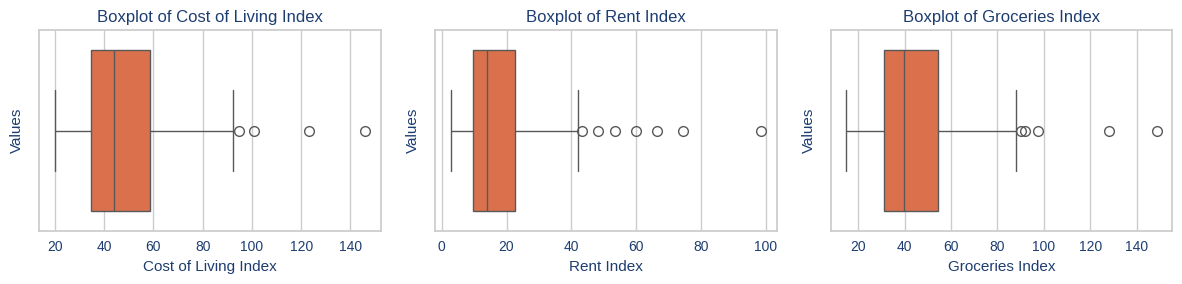

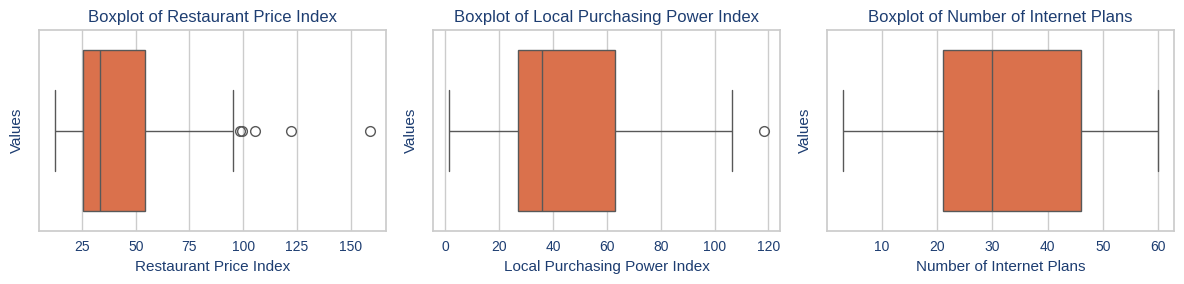

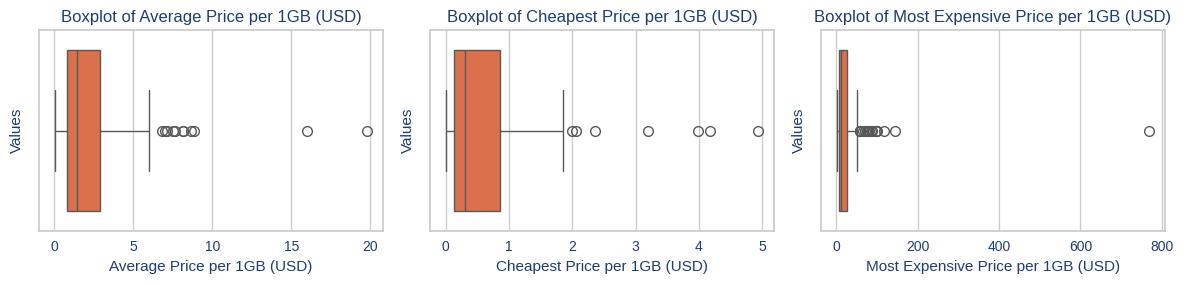

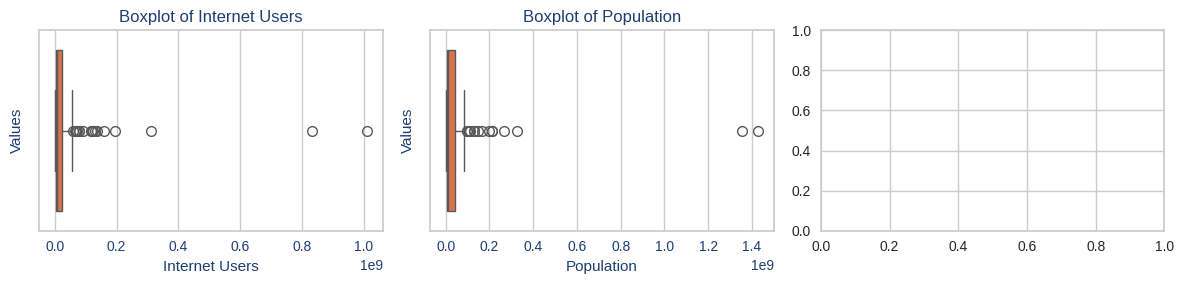

In [421]:
for i in range(0, 12, 3):
    cols = numerical_df.columns[i:i+3]

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))

    for j, kolom in enumerate(cols):
        sns.boxplot(x=numerical_df[kolom], ax=axs[j], color='#F26634')
        axs[j].set_facecolor('white')
        axs[j].set_title(f'Boxplot of {kolom}', color='#1D3D71')
        axs[j].set_xlabel(kolom, color='#1D3D71')
        axs[j].set_ylabel('Values', color='#1D3D71')
        axs[j].tick_params(colors='#1D3D71')

    plt.tight_layout()
    plt.show()

Terlihat Data memiliki outliers. Perlu hati-hati dalam menangani Outliers karena beberapa hal:  
1. Nampaknya outliers bersifat natural.  
2. PCA dan KMeans sensitif dan tidak robust terhadap outliers.  

2 Point ini akan jadi pertimbangan saya untuk handle outliers pada tahap Feature engineering.

## Distribusi Data

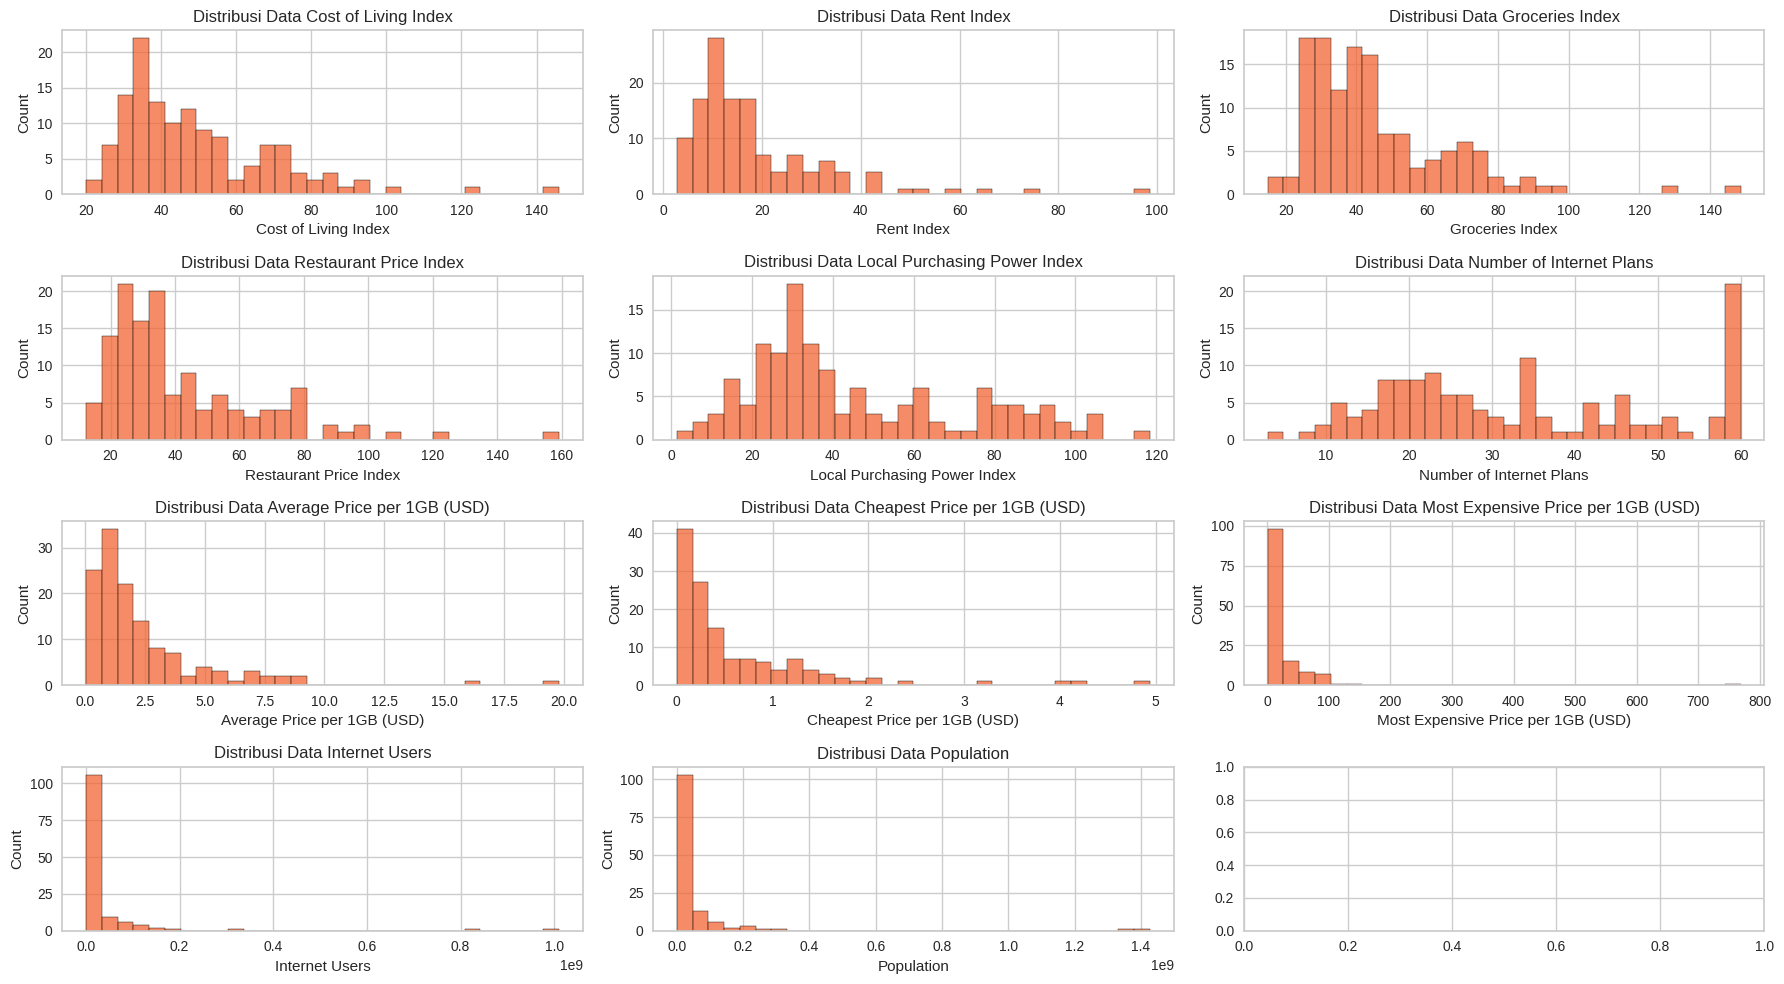

In [422]:
cols = len(numerical_df.columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, kolom in enumerate(numerical_df.columns):
    ax = sns.histplot(data=numerical_df, x=kolom, color='#F26634', bins=30, ax=axes[i])
    ax.set_title(f'Distribusi Data {kolom}')
    ax.set_xlabel(kolom)

plt.tight_layout()
plt.show()

Hampir semua data skew. Ke kiri atau ke kanan. Namun hal ini bisa dihandle oleh PCA

## Gambaran Statistika

In [423]:
categorical_df.describe().T

,count,unique,top,freq
Country,131,131,Afghanistan,1
Country code,131,131,AF,1
Continental Region,131,13,ASIA (EX. NEAR EAST),22


Terlihan Negara terdapat sebanyak 131 dan 13 Kawasan ? Region.

In [424]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost of Living Index,131.0,4.949695e+01,2.066770e+01,19.92,34.635,44.08,5.868000e+01,1.460400e+02
Rent Index,131.0,1.866656e+01,1.461465e+01,2.72,9.515,13.93,2.266500e+01,9.858000e+01
Groceries Index,131.0,4.612473e+01,2.099252e+01,14.92,31.070,39.74,5.450000e+01,1.486600e+02
Restaurant Price Index,131.0,4.258069e+01,2.462420e+01,12.41,25.210,33.54,5.410500e+01,1.591700e+02
Local Purchasing Power Index,131.0,4.600840e+01,2.693088e+01,1.45,27.040,35.87,6.304500e+01,1.184400e+02
Number of Internet Plans,131.0,3.364122e+01,1.635146e+01,3.00,21.000,30.00,4.600000e+01,6.000000e+01
Average Price per 1GB (USD),131.0,2.448550e+00,2.801036e+00,0.05,0.820,1.47,2.885000e+00,1.980000e+01
Cheapest Price per 1GB (USD),131.0,6.187023e-01,8.191810e-01,0.00,0.125,0.30,8.550000e-01,4.940000e+00
Most Expensive Price per 1GB (USD),131.0,2.773466e+01,7.068561e+01,0.85,5.515,10.93,2.555000e+01,7.688700e+02
Internet Users,131.0,3.704162e+07,1.192465e+08,55677.00,2451955.500,6788737.00,2.370822e+07,1.010740e+09


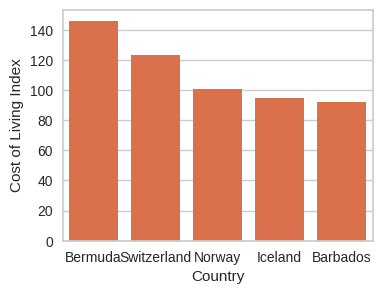

In [425]:
x = df[['Country','Cost of Living Index']].sort_values(by = 'Cost of Living Index', ascending = False).head(5)

plt.figure(figsize=(4,3))
# ax = sns.histplot(data=flt_col, x=kolom, color='#F26634', bins=30, ax=axes[i])
ax= sns.barplot(data=x, x='Country', y='Cost of Living Index', color='#F26634')
plt.xlabel('Country')
plt.ylabel('Cost of Living Index')
plt.legend()
plt.show()

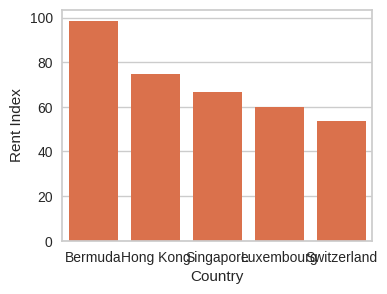

In [426]:
x = df[['Country','Rent Index']].sort_values(by = 'Rent Index', ascending = False).head(5)

plt.figure(figsize=(4,3))
# ax = sns.histplot(data=flt_col, x=kolom, color='#F26634', bins=30, ax=axes[i])
ax= sns.barplot(data=x, x='Country', y='Rent Index', color='#F26634')
plt.xlabel('Country')
plt.ylabel('Rent Index')
plt.legend()
plt.show()

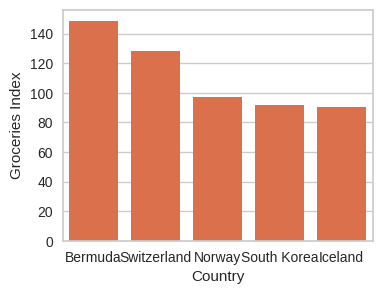

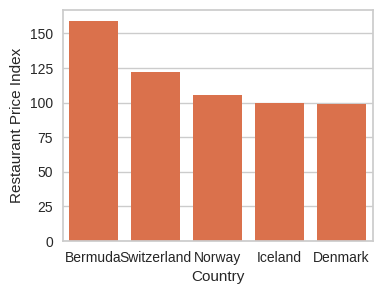

In [427]:
x = df[['Country','Groceries Index']].sort_values(by = 'Groceries Index', ascending = False).head(5)
y = df[['Country','Restaurant Price Index']].sort_values(by = 'Restaurant Price Index', ascending = False).head(5)

plt.figure(figsize=(4,3))
# ax = sns.histplot(data=flt_col, x=kolom, color='#F26634', bins=30, ax=axes[i])
ax= sns.barplot(data=x, x='Country', y='Groceries Index', color='#F26634')
plt.xlabel('Country')
plt.ylabel('Groceries Index')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
# ax = sns.histplot(data=flt_col, x=kolom, color='#F26634', bins=30, ax=axes[i])
ax= sns.barplot(data=y, x='Country', y='Restaurant Price Index', color='#F26634')
plt.xlabel('Country')
plt.ylabel('Restaurant Price Index')
plt.legend()
plt.show()

# 5. Future Engineering

## Outlier Handling

Saya akan menggunakan angka 3 sebagai pengali dari IQR guna menjaga jumlah baris agar tidak banyak berkurang

In [428]:
for col in df.columns:
  if df[col].dtype == 'float64' or df[col].dtype == 'int64':
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - 3 * IQR
      upper_bound = Q3 + 3 * IQR

      outlier_indices = df[df[col] > upper_bound].index
      df = df.drop(outlier_indices)

numerical_df= df.drop(['Country', 'Country code','Continental Region'], axis=1)
categorical_df= df[['Country', 'Country code','Continental Region']]
print(df.columns)
print(df.shape)


Index(['Country', 'Country code', 'Continental Region', 'Cost of Living Index',
       'Rent Index', 'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Number of Internet Plans',
       'Average Price per 1GB (USD)', 'Cheapest Price per 1GB (USD)',
       'Most Expensive Price per 1GB (USD)', 'Internet Users', 'Population'],
      dtype='object')
(102, 14)


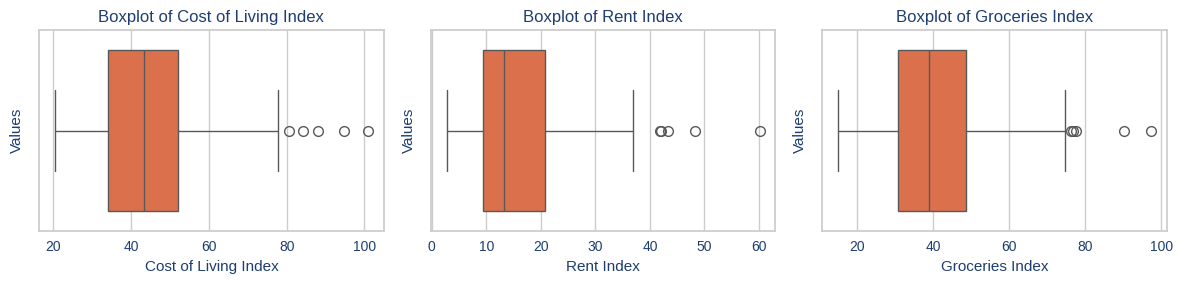

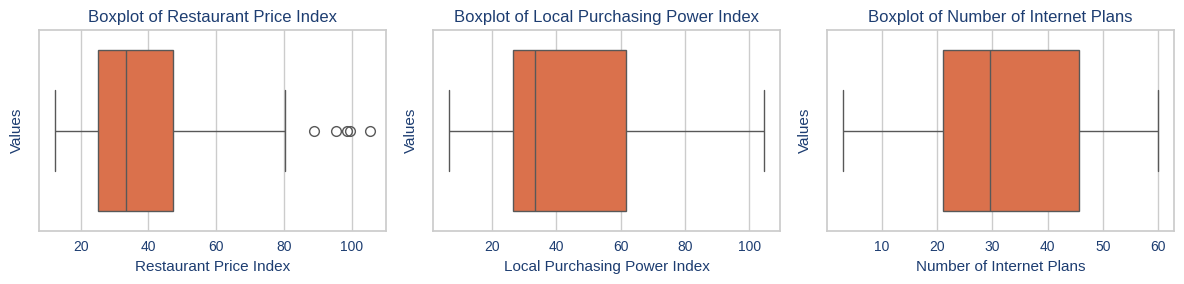

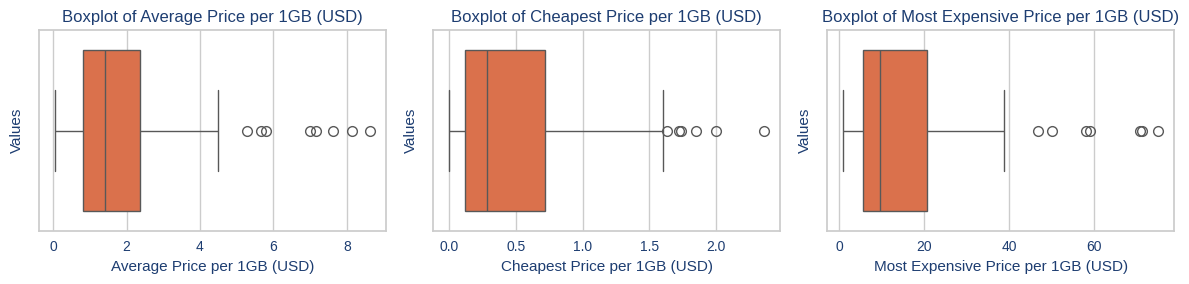

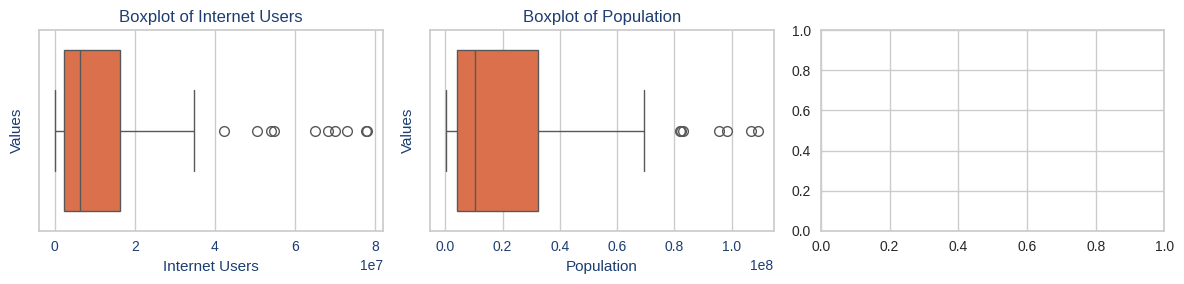

In [429]:
for i in range(0, 12, 3):
    cols = numerical_df.columns[i:i+3]

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))

    for j, kolom in enumerate(cols):
        sns.boxplot(x=numerical_df[kolom], ax=axs[j], color='#F26634')
        axs[j].set_facecolor('white')
        axs[j].set_title(f'Boxplot of {kolom}', color='#1D3D71')
        axs[j].set_xlabel(kolom, color='#1D3D71')
        axs[j].set_ylabel('Values', color='#1D3D71')
        axs[j].tick_params(colors='#1D3D71')

    plt.tight_layout()
    plt.show()

## Dimensionality Reduction

In [430]:
numerical_df

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0
2,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0
3,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0
4,33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0
5,77.75,36.84,77.44,72.95,104.63,46.0,0.70,0.10,7.62,21159515.0,24898152.0
...,...,...,...,...,...,...,...,...,...,...,...
130,69.65,31.84,56.58,76.79,88.78,60.0,1.42,0.11,71.29,65001016.0,67141684.0
132,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0
133,27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0
134,37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0


In [431]:
# Feature scaling
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_df)

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(numerical_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

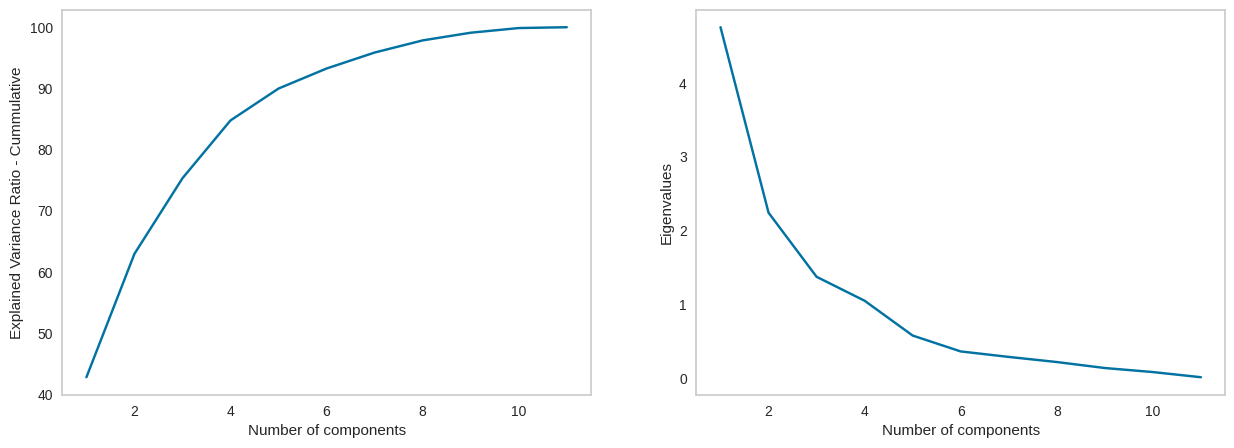

In [432]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 12), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 12), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [433]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print(f"Jumlah fitur jika kita ingin mempertahankan inforamsi utama sebanyak 95% adalah sebanyak {num_features} Fitur")

Jumlah fitur jika kita ingin mempertahankan inforamsi utama sebanyak 95% adalah sebanyak 7 Fitur


In [434]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(numerical_scaled)

numerical_scaled_pca = pca.transform(numerical_scaled)

# 6. Model Definition

# Optimal Number of Clusters

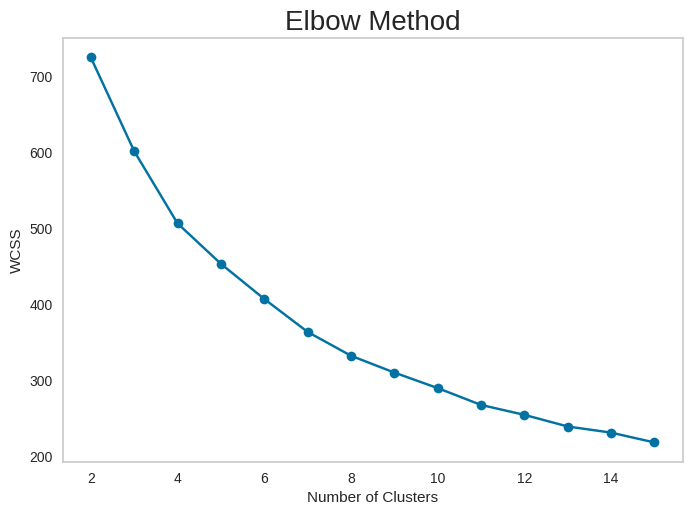

In [435]:
# Find the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(numerical_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

---
**Highlits**

Berdasarkan plot di atas, curva mulai mendatar pada jumlah cluster > 4. Tetapi kita akan lihat lebih jelas pada Silhouette dan Score di bawah ini

## Silhoutte Plot & Silhoutte Score

In [436]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.37965041359751595
For n_clusters = 3 The average silhouette_score is : 0.22204264727345402
For n_clusters = 4 The average silhouette_score is : 0.2949752364452453
For n_clusters = 5 The average silhouette_score is : 0.2878781584733781
For n_clusters = 6 The average silhouette_score is : 0.24291596492088818
For n_clusters = 7 The average silhouette_score is : 0.22945128499444528
For n_clusters = 8 The average silhouette_score is : 0.24374378376424444
For n_clusters = 9 The average silhouette_score is : 0.22184409072853964
For n_clusters = 10 The average silhouette_score is : 0.2211798426135184
For n_clusters = 11 The average silhouette_score is : 0.25173451021570203
For n_clusters = 12 The average silhouette_score is : 0.24090134827552612
For n_clusters = 13 The average silhouette_score is : 0.21866414357672245
For n_clusters = 14 The average silhouette_score is : 0.21204077981409325


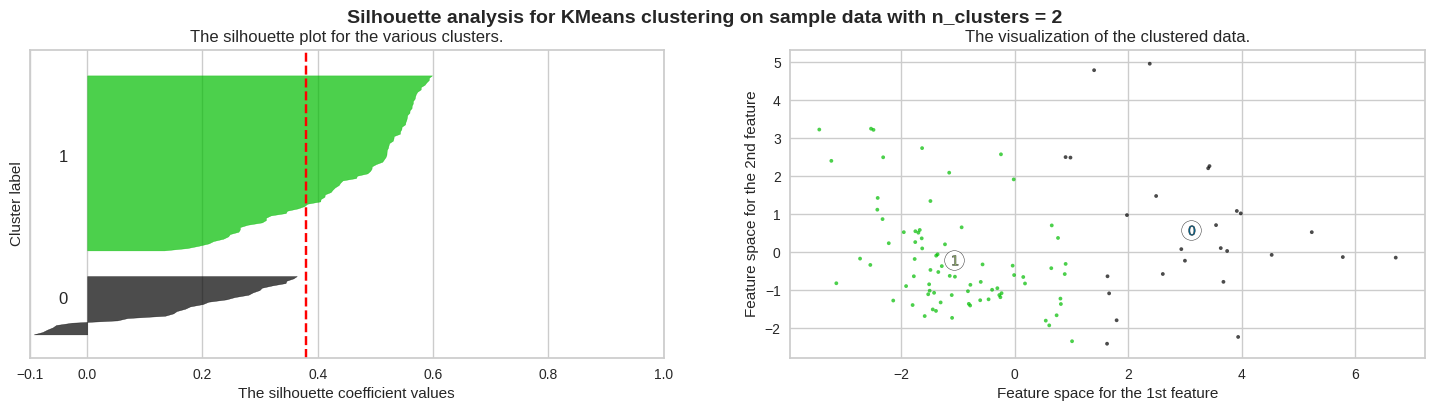

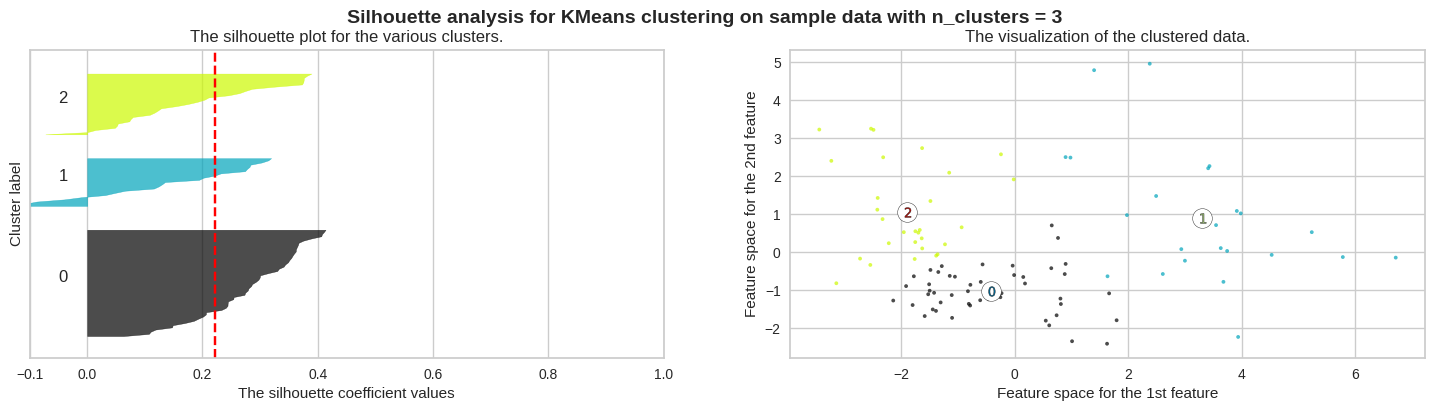

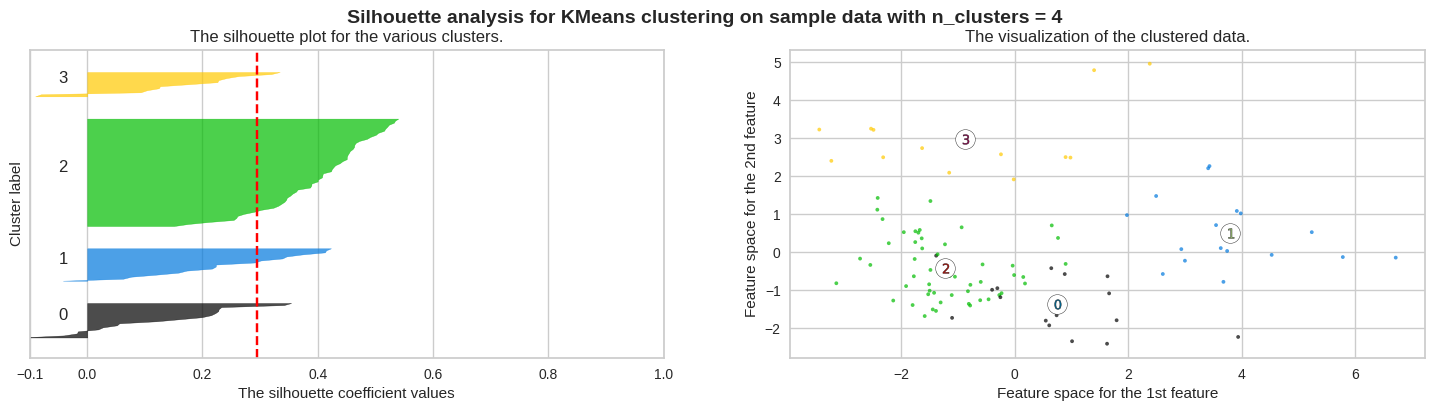

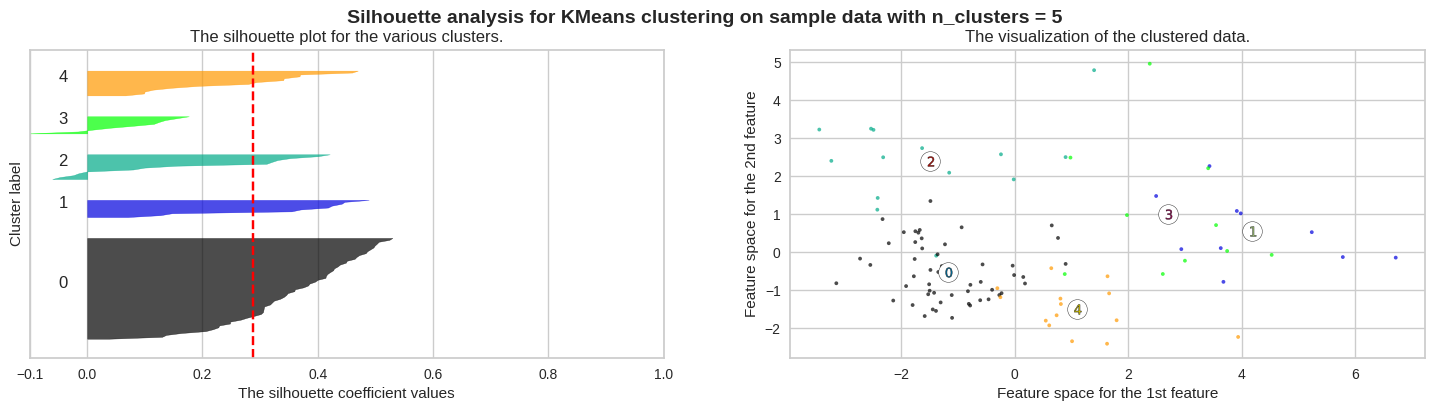

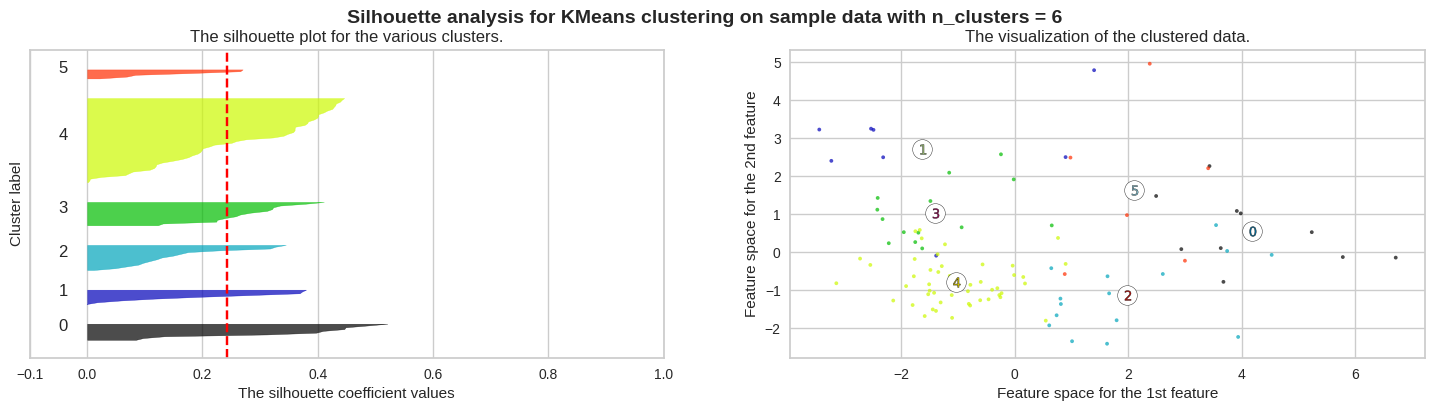

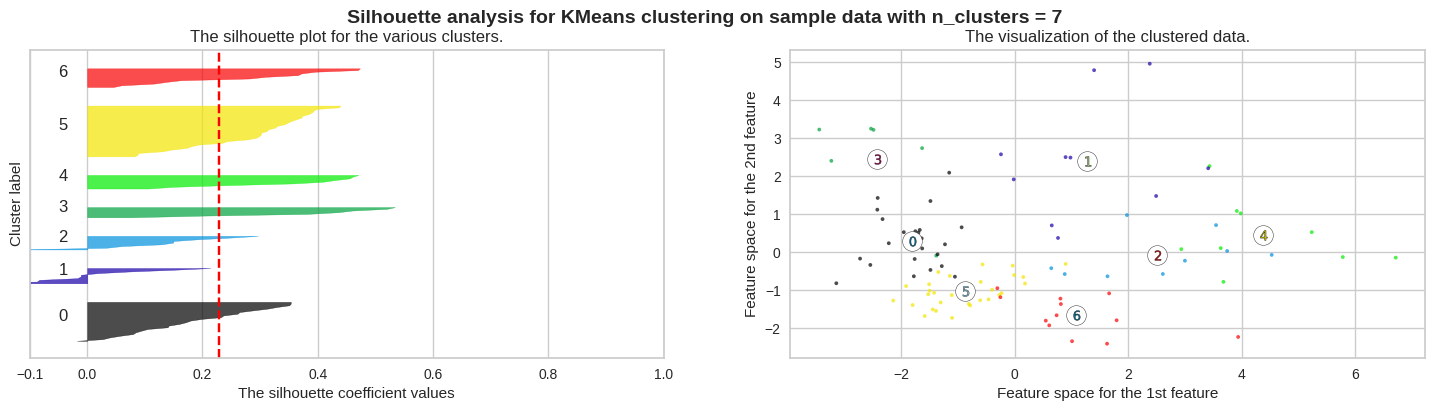

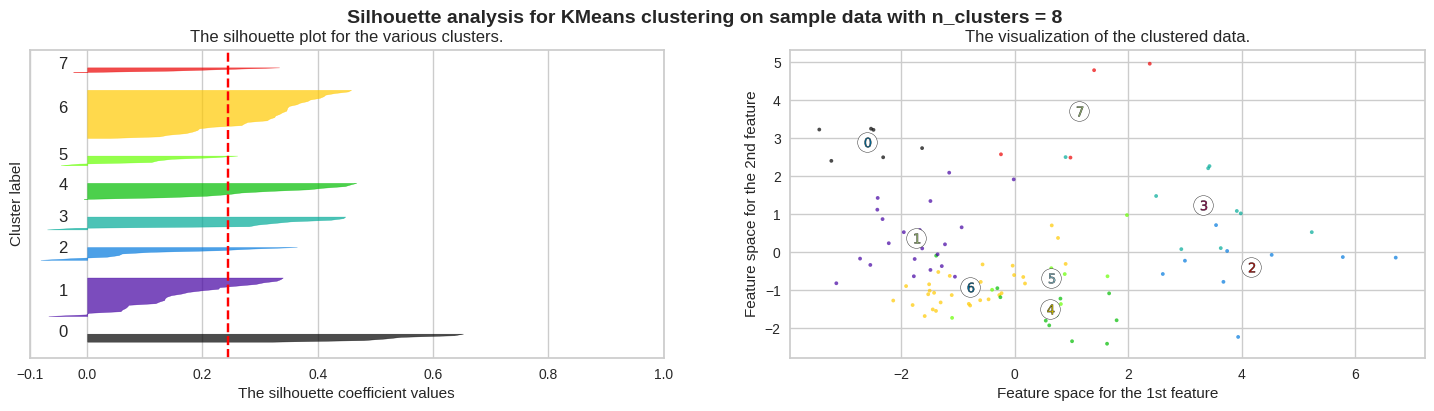

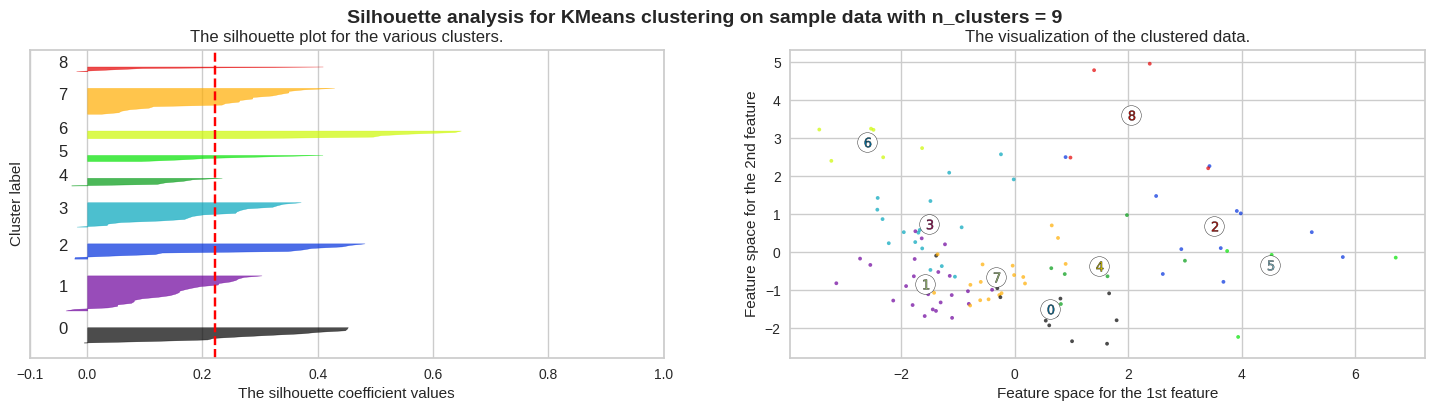

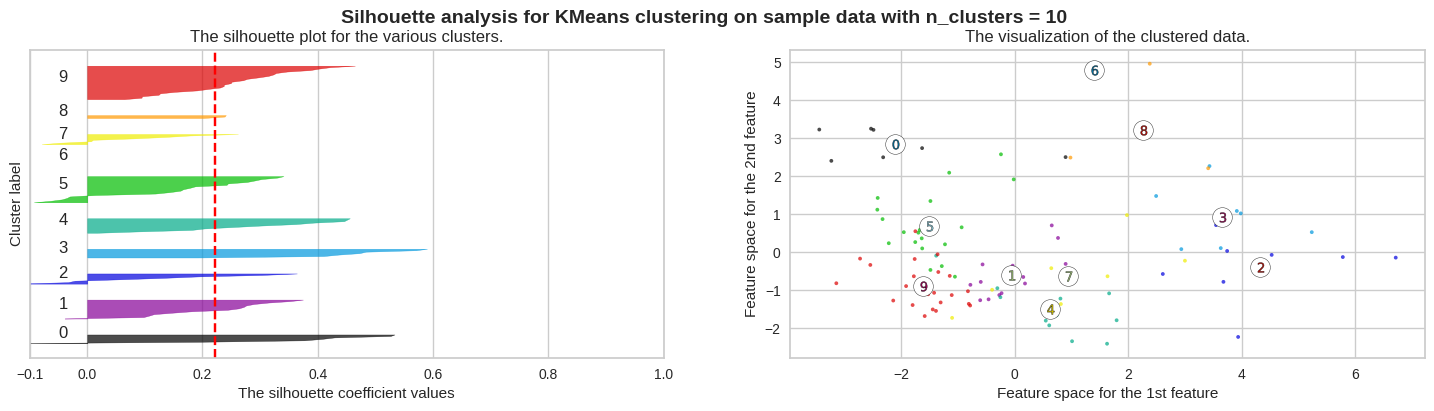

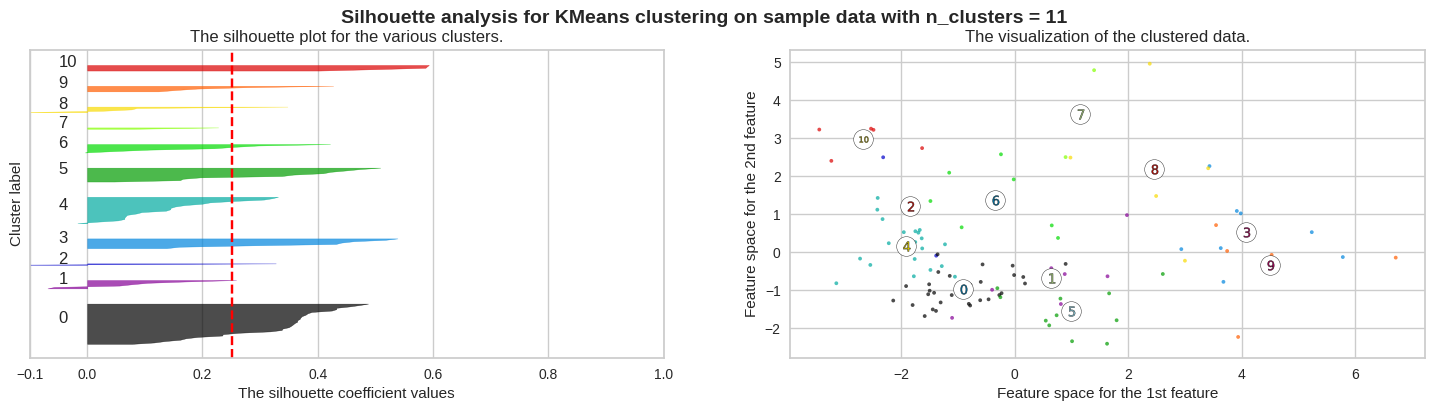

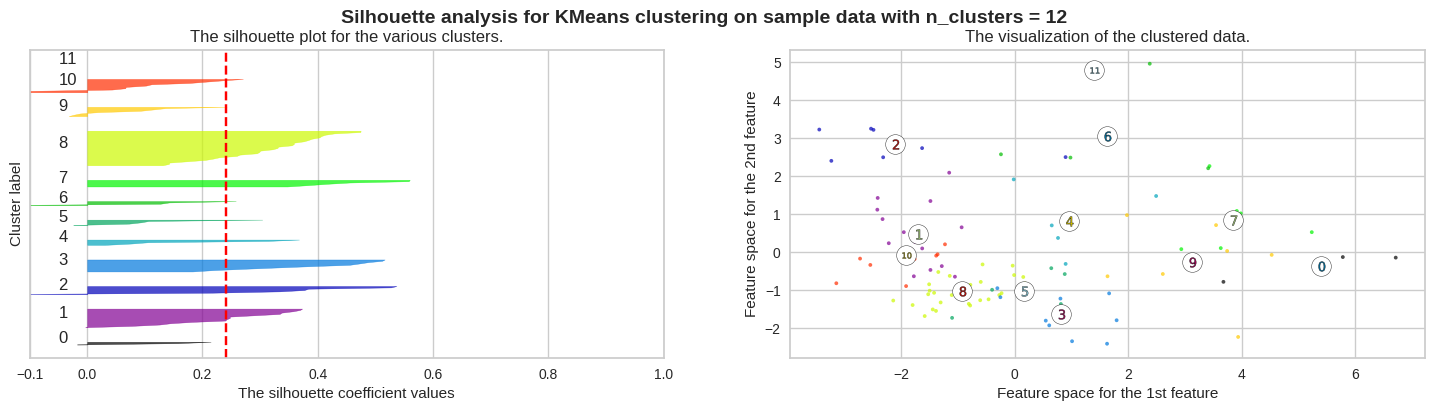

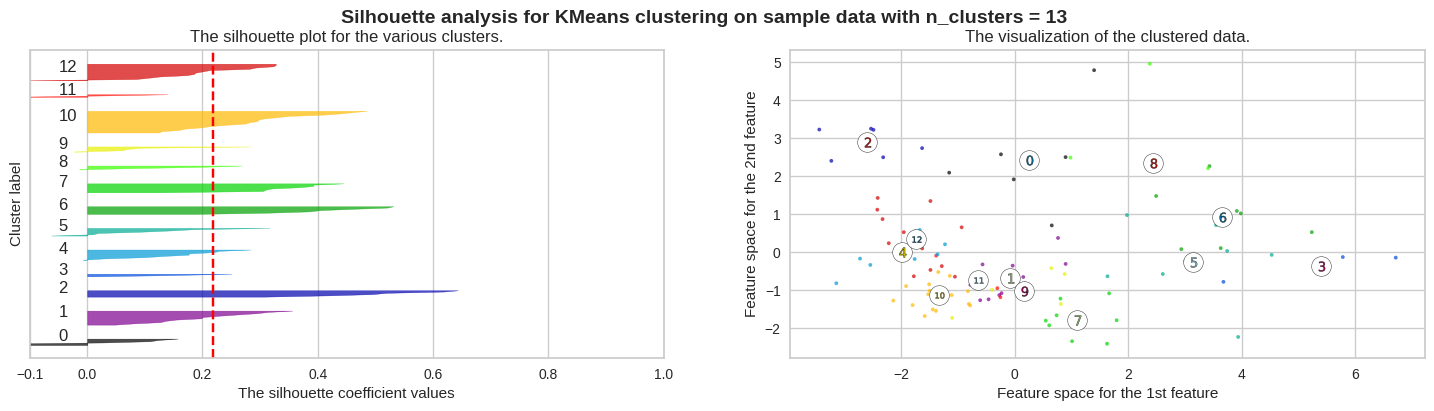

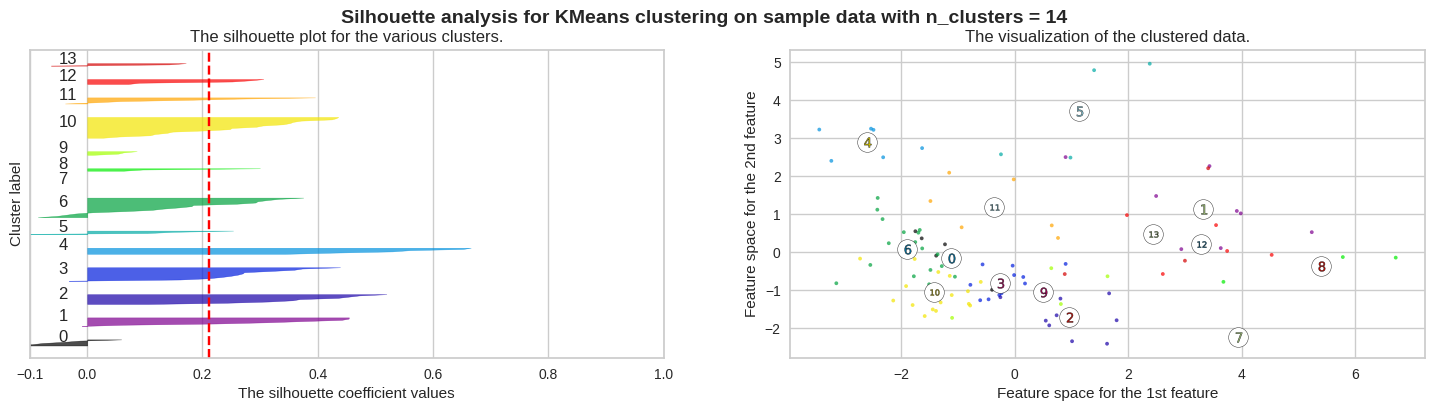

In [437]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), numerical_scaled_pca, random_state)

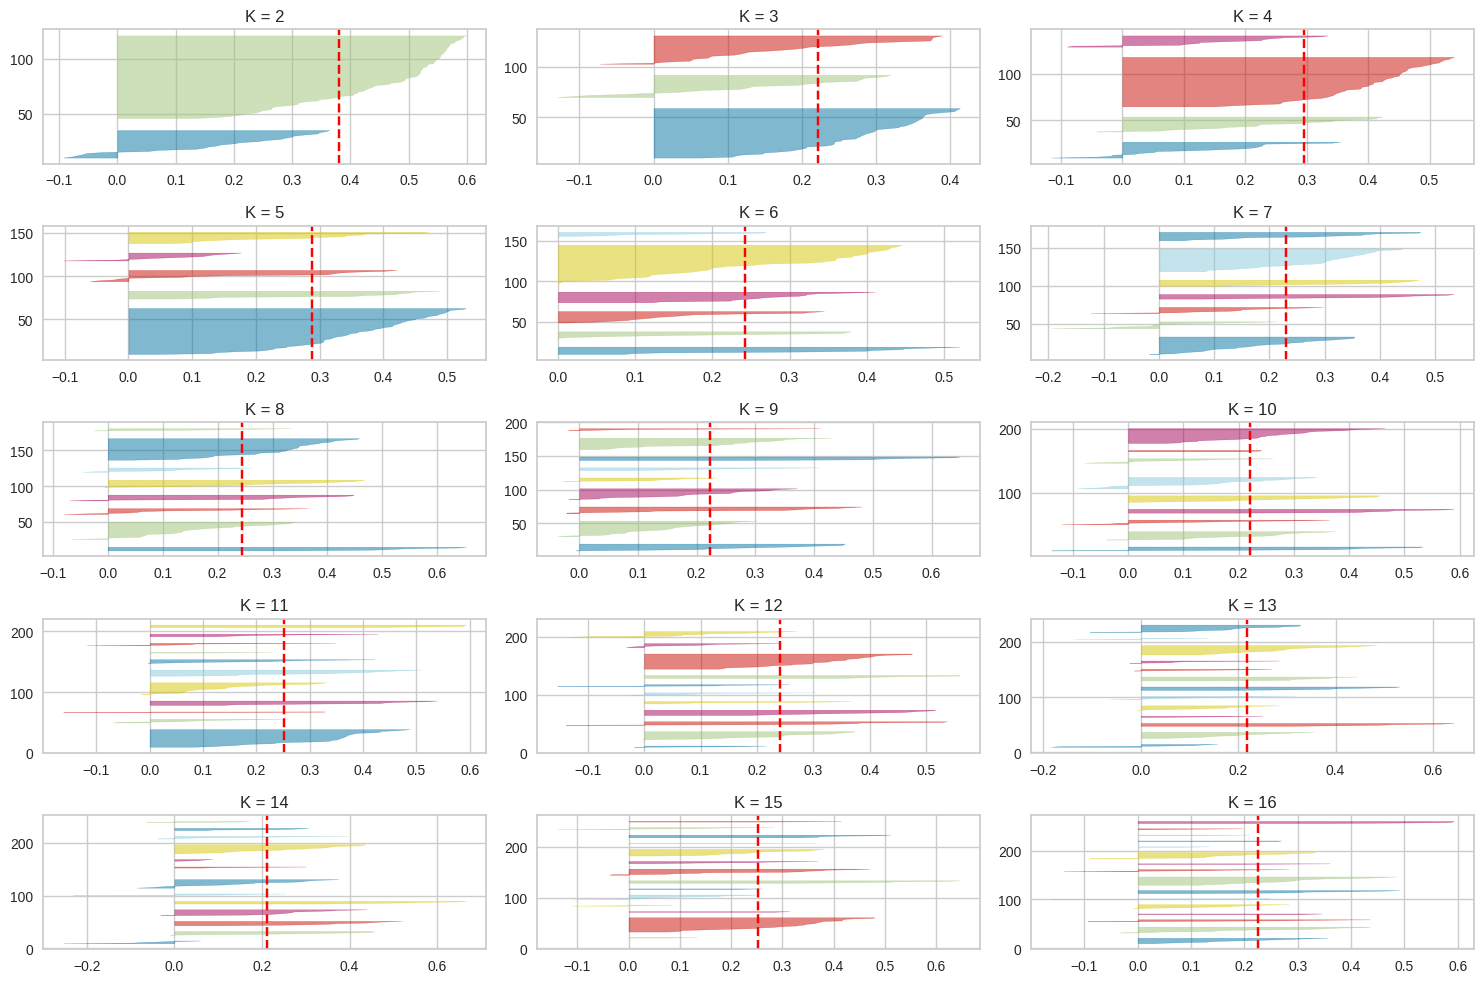

In [438]:
# Display the Silhouette Score and Plot Silhouette Plot
from yellowbrick.cluster import SilhouetteVisualizer

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(numerical_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Secara score 2 cluster paling tinggi skorenya. Namun secara visualisasi cluster 3 lebih ok dimana setiap cluster melewati garis dan tidak saling overlapping

## Train with the Optimal Number of Clusters

# 7. Model Training

In [451]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(numerical_scaled_pca)
pred


array([2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1,
       2, 2, 3, 2, 2, 0, 2, 1, 2, 3, 2, 0, 0, 2, 1, 3, 2, 1, 1, 3, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 2, 3, 3, 0, 1, 1, 2, 2, 3, 2, 2, 0, 0, 2, 3, 3, 2, 0, 1,
       0, 1, 2, 3, 2, 3, 2, 2, 1, 3, 2, 2, 3, 2], dtype=int32)

# 8. Model Evaluation

<Axes: >

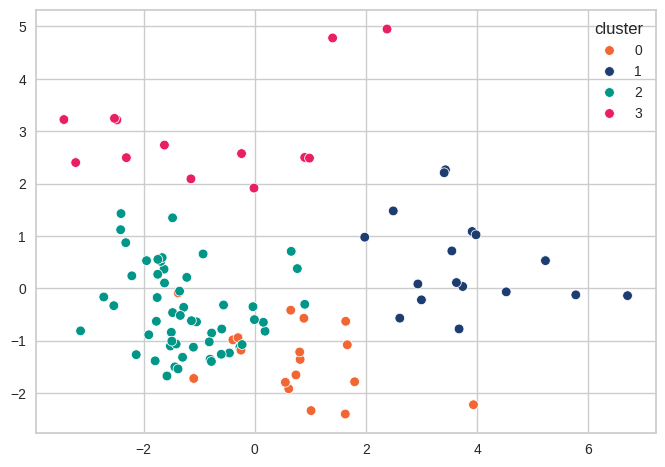

In [452]:
# Insert clustering result into original dataset
new_df= df.copy()
new_df['cluster'] = pred
new_df
# Cluster visualization in 2D

pca_2d = PCA(n_components=7)
pca_2d.fit(numerical_scaled)

numerical_scaled_pca_2d = pca_2d.fit_transform(numerical_scaled)

colors = ["#F26634", "#1D3D71", "#009688", "#E91E63", "#FFC107", "#4CAF50", "#9C27B0"]
sns.scatterplot(x=numerical_scaled_pca_2d[:,0], y=numerical_scaled_pca_2d[:,1], hue=new_df['cluster'], palette= colors)

In [453]:
new_df

,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population,cluster
0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0,2
2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0,2
3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0,2
4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0,2
5,Australia,AU,OCEANIA,77.75,36.84,77.44,72.95,104.63,46.0,0.70,0.10,7.62,21159515.0,24898152.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,United Kingdom,GB,WESTERN EUROPE,69.65,31.84,56.58,76.79,88.78,60.0,1.42,0.11,71.29,65001016.0,67141684.0,3
132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0,2
133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0,2
134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0,3


# 9. Model Saving

In [442]:
from joblib import dump

# Menyimpan model ke file
model_path = 'kmeans_model.pkl'
dump(km, model_path)

print(f"Model telah disimpan sebagai {model_path}")


Model telah disimpan sebagai kmeans_model.pkl


# 10. Model Inference

Saya tidak mengerti bagian ini, karena ketika generate baris baru harus proses seperti awal harus drop categorical, scaling dst.

# 11. Pengambilan Keputusan

## 2nd EDA

In [443]:
cluster0= new_df[new_df['cluster']==0]
cluster1= new_df[new_df['cluster']==1]
cluster2= new_df[new_df['cluster']==2]
cluster3= new_df[new_df['cluster']==3]

In [454]:
cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost of Living Index,18.0,4.812500e+01,7.755888e+00,28.75,4.526250e+01,48.090,5.139750e+01,6.593000e+01
Rent Index,18.0,1.708333e+01,7.475718e+00,5.17,1.167250e+01,15.855,2.014750e+01,3.235000e+01
Groceries Index,18.0,4.369222e+01,8.319814e+00,29.34,3.853000e+01,42.340,4.805000e+01,6.155000e+01
Restaurant Price Index,18.0,4.048556e+01,1.563397e+01,18.03,3.312250e+01,36.660,4.240000e+01,7.961000e+01
Local Purchasing Power Index,18.0,3.534278e+01,1.949907e+01,6.59,2.116000e+01,32.590,5.043750e+01,6.647000e+01
Number of Internet Plans,18.0,2.138889e+01,1.001845e+01,3.00,1.425000e+01,22.000,2.625000e+01,4.500000e+01
Average Price per 1GB (USD),18.0,3.688889e+00,2.153183e+00,1.56,2.180000e+00,3.105,3.902500e+00,8.640000e+00
Cheapest Price per 1GB (USD),18.0,1.276111e+00,5.621925e-01,0.19,9.650000e-01,1.280,1.622500e+00,2.360000e+00
Most Expensive Price per 1GB (USD),18.0,2.125833e+01,1.925156e+01,2.73,6.985000e+00,13.550,3.591250e+01,7.087000e+01
Internet Users,18.0,4.647184e+06,5.235943e+06,55677.00,1.064205e+06,2674822.500,7.280964e+06,1.954308e+07
